# Practice Project - 6
Advertising Sales Channel Prediction
Problem Statement:

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [171]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Sl.No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.isnull()

,Sl.No.,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [4]:
df.isnull().sum()

Sl.No.       0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

The dataset does not have any NaN values

In [5]:
df.dtypes

Sl.No.         int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Dataset has all float values.

In [6]:
(df.loc[0:]==" ").sum()

Sl.No.       0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Dataset does not have any null values 

In [7]:
(df.loc[0:]==0).sum()

Sl.No.       0
TV           0
radio        1
newspaper    0
sales        0
dtype: int64

Dataset has one features (radio) with value=0. Which is possible, when the radio channel had no contribution to sales.

# EDA

<AxesSubplot:xlabel='TV'>

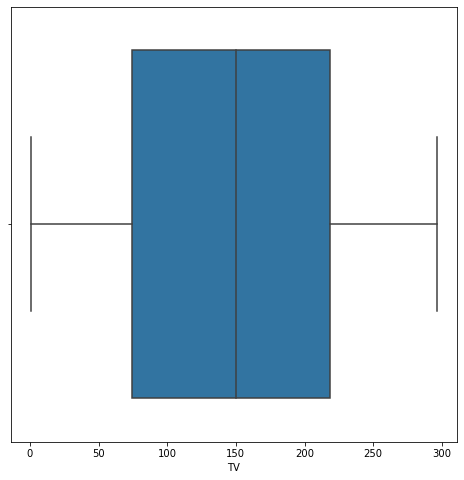

In [8]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df,x="TV")

50th percentile (median) for the TV channel = 150 

<AxesSubplot:xlabel='sales', ylabel='TV'>

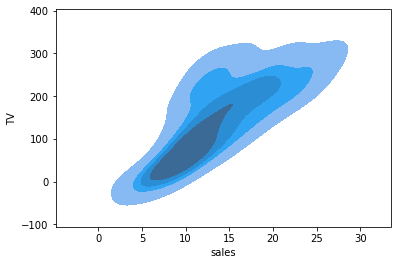

In [9]:
sns.kdeplot(data=df,x="sales",y="TV",levels=5,fill=True)

Higher density is noticed with Tv channels between 0-200 units and sales between 5-20 units

<AxesSubplot:xlabel='radio'>

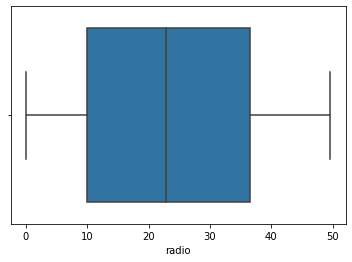

In [10]:
sns.boxplot(data=df,x="radio")

No evident outliers, 50th percentile is between 20-25

<AxesSubplot:xlabel='newspaper'>

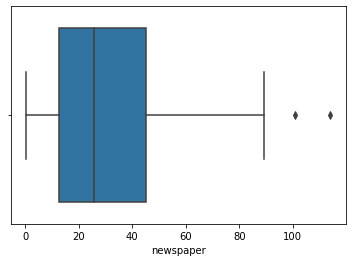

In [11]:
sns.boxplot(data=df,x="newspaper")

Newspaper channel seems to have a few outliers. 

<AxesSubplot:xlabel='TV', ylabel='sales'>

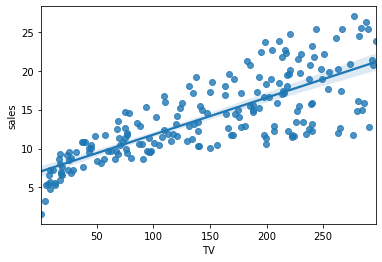

In [12]:
sns.regplot(data=df,x="TV",y="sales")

TV and sales have a linear approach. When the units of the TV channels have increased the sales has also followed.

The curve does have a y-intercept. 

<AxesSubplot:xlabel='radio', ylabel='sales'>

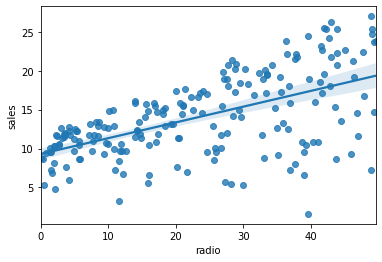

In [13]:
sns.regplot(data=df,x="radio",y="sales")

Radio and sales have a linear relationship. When the radio channel had units =0 the sales were close to 10 as the units on the channel increased there is an increase in the overall sales.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

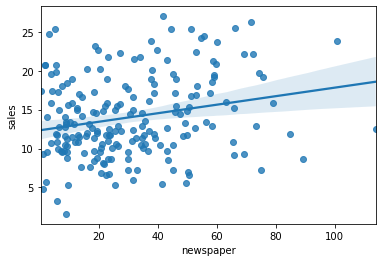

In [14]:
sns.regplot(data=df,x="newspaper",y="sales")

newspaper and sales also have a linear relationship. 

Worth noticing is the curve between newspaper and sales have a flatter curve when compaired with the curve between radio and sales. 

Likewise,the curve between radio and sales is flatter than the curve between TV and sales. 

Which indicates TV channels to be an effective means to increase sales when compared to radio or newspaper.

In [15]:
df=df.drop(["Sl.No."],axis=1)

In [16]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

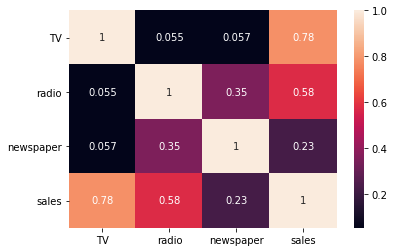

In [17]:
sns.heatmap(df.corr(),annot=True)

1. All features are positively correlated with sales. 


2. No multi-colinearity. 


3. TV has the highest correlation with sales (0.78). 


4. Newspaper has the least correlation (0.23).

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


No null values and features are float

In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Checking for outliers and skewness

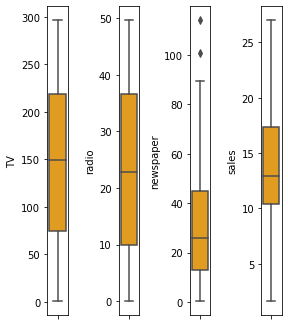

In [172]:
collist=df.columns.values
ncol=15 #no.of columns and rows to display the graphs i.e max col and max row
nrows=10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color="orange",orient="v")
    plt.tight_layout()


    
Newspaper has outliers. 

In [21]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64


    
newspaper has skewness over 0.5.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

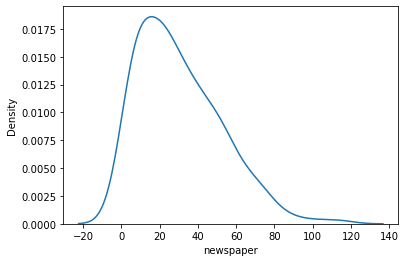

In [22]:
sns.kdeplot(data=df,x="newspaper")

<AxesSubplot:xlabel='TV', ylabel='Density'>

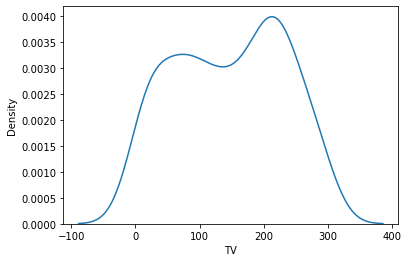

In [23]:
sns.kdeplot(data=df,x="TV")

<AxesSubplot:xlabel='radio', ylabel='Density'>

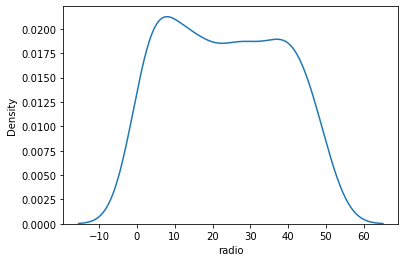

In [24]:
sns.kdeplot(data=df,x="radio")

<AxesSubplot:xlabel='sales', ylabel='Density'>

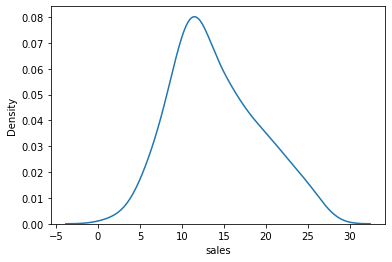

In [25]:
sns.kdeplot(data=df,x="sales")

Features do not show a normally distributed curve. 

# Data Cleaning 

In [26]:
import scipy 
from scipy.stats import zscore

In [27]:
z=np.abs(zscore(df)) 
z.shape

(200, 4)

In [28]:
threshold=3  #removing outliers 
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 4)
(198, 4)


In [29]:
#dataloss
loss=(200-198)/200*100
loss

1.0

Since the dataloss is less than 10% we can proceed.

In [30]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [31]:
#removing skewness

from sklearn.preprocessing import power_transform 
x=power_transform(x,method="yeo-johnson")

In [32]:
x_df=pd.DataFrame(data=x)
x_df.skew()

0   -0.320682
1   -0.236668
2   -0.101288
dtype: float64

All features have skewness between -0.5 - 0.5

# Preprocessing

In [33]:
import sklearn
from sklearn.preprocessing import StandardScaler 

In [34]:
ss=StandardScaler()
x=ss.fit_transform(x)

# Linear Regression 

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split 

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [37]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_train=r2_score(pred_train,y_train)
    r2_test=r2_score(pred_test,y_test)
    print("Accuracy_train=",r2_train,"At random_state =",i)
    print("Accuracy_test=",r2_test,"At random_state =",i)
    print("\n")

Accuracy_train= 0.8904804356502444 At random_state = 0
Accuracy_test= 0.8995517052176801 At random_state = 0


Accuracy_train= 0.8981453316965803 At random_state = 1
Accuracy_test= 0.8945848152555803 At random_state = 1


Accuracy_train= 0.9065645892224969 At random_state = 2
Accuracy_test= 0.8449269806363064 At random_state = 2


Accuracy_train= 0.8936441876631789 At random_state = 3
Accuracy_test= 0.9040425441959382 At random_state = 3


Accuracy_train= 0.8986974112685384 At random_state = 4
Accuracy_test= 0.8769945124740706 At random_state = 4


Accuracy_train= 0.894344773014199 At random_state = 5
Accuracy_test= 0.8817747196879592 At random_state = 5


Accuracy_train= 0.8976645054572485 At random_state = 6
Accuracy_test= 0.8437881484495259 At random_state = 6


Accuracy_train= 0.8930836046305419 At random_state = 7
Accuracy_test= 0.8980924110849856 At random_state = 7


Accuracy_train= 0.8993605579515119 At random_state = 8
Accuracy_test= 0.8255028722519442 At random_state = 8


Ac

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=37,test_size=0.2)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
r2_train=r2_score(pred_train,y_train)
r2_test=r2_score(pred_test,y_test)
print("Accuracy_train=",r2_train)
print("Accuracy_test=",r2_test)

Accuracy_train= 0.8919256749829311
Accuracy_test= 0.9159730642913833


# Regularization

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso

In [40]:
parameters={"alpha":[0.0001,.001,0.1,1,10],"random_state":list(range(0,100)),"max_iter":list(range(100,200)),"selection":["cyclic","random"]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'max_iter': 100, 'random_state': 90, 'selection': 'random'}


In [41]:
ls=Lasso(alpha=0.1,random_state=90,max_iter=100,selection="random",fit_intercept=True)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
lss=r2_score(y_test,pred_ls)
lss_train=r2_score(y_train,pred_train)
print("Test Accuracy = ",lss)
print("Train Accuracy = ",lss_train)

Test Accuracy =  0.9161428330070626
Train Accuracy =  0.9015438637000179


In [42]:
for i in range(2,11):
    lss_cv=cross_val_score(ls,x,y,cv=i)
    lssc=lss_cv.mean()
    print("Score =",lssc*100,"at cv =",i)

Score = 90.14615075512133 at cv = 2
Score = 89.7234834599248 at cv = 3
Score = 89.80784403656428 at cv = 4
Score = 89.5780138287583 at cv = 5
Score = 89.8167014580228 at cv = 6
Score = 89.46420818070641 at cv = 7
Score = 89.8153283579087 at cv = 8
Score = 89.37135261966867 at cv = 9
Score = 89.55776414957968 at cv = 10


# Ensembling 

In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [76]:
parameters={"loss":["linear","square","exponential"],"n_estimators":list(range(50,100))}
ad=AdaBoostRegressor()
clf=GridSearchCV(ad,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'loss': 'square', 'n_estimators': 84}


In [77]:
for i in range(1,100):
    ad=AdaBoostRegressor(loss="square",n_estimators=84,random_state=i)
    ad.fit(x_train,y_train)
    y_ad=ad.predict(x_test)
    r2_score(y_test,y_ad)
    print("Acc =", r2_score(y_test,y_ad),"RS=",i)

Acc = 0.9268060797086572 RS= 1
Acc = 0.9361367645274258 RS= 2
Acc = 0.9450943450263865 RS= 3
Acc = 0.9281982441471591 RS= 4
Acc = 0.9316473299165042 RS= 5
Acc = 0.9353486884507042 RS= 6
Acc = 0.9357764972983182 RS= 7
Acc = 0.9351617086500557 RS= 8
Acc = 0.9427044752963926 RS= 9
Acc = 0.9344034245317754 RS= 10
Acc = 0.9412265109362312 RS= 11
Acc = 0.9412270760045964 RS= 12
Acc = 0.9359558839959561 RS= 13
Acc = 0.9366419150430938 RS= 14
Acc = 0.9279145390249538 RS= 15
Acc = 0.9224507367417993 RS= 16
Acc = 0.9406272569093322 RS= 17
Acc = 0.9326848879769947 RS= 18
Acc = 0.9192249389155254 RS= 19
Acc = 0.9359034850335746 RS= 20
Acc = 0.9357309818189505 RS= 21
Acc = 0.9327067468925746 RS= 22
Acc = 0.9476339747561039 RS= 23
Acc = 0.9308756420630426 RS= 24
Acc = 0.9392254963243369 RS= 25
Acc = 0.9469172984697858 RS= 26
Acc = 0.9455739857761484 RS= 27
Acc = 0.9345132310381417 RS= 28
Acc = 0.9378455365821186 RS= 29
Acc = 0.9363758902423425 RS= 30
Acc = 0.9513232030340564 RS= 31
Acc = 0.935785738

In [78]:
ad=AdaBoostRegressor(loss="square",n_estimators=84,random_state=31)
ad.fit(x_train,y_train)
y_ad=ad.predict(x_test)
r2_score(y_test,y_ad)

0.9513232030340564

# DecisionTreeRegressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
parameters={"criterion":["mse","friedman_mse","mae","poisson"],"splitter":["best","random"],"max_features":["auto","sqrt","log2"]}

decisionTreeRegressor = DecisionTreeRegressor()
clf=GridSearchCV(decisionTreeRegressor,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}


In [87]:
decisionTreeRegressor = DecisionTreeRegressor(criterion="mse",max_features="auto",splitter="best",random_state=50)
decisionTreeRegressor.fit(x_train,y_train)
y_pred = decisionTreeRegressor.predict(x_test)
r2_score(y_test,y_pred)

0.9428254185009861

# SVR

In [145]:
from sklearn.svm import SVR

In [159]:
parameters={"kernel":["linear","poly","sigmoid"],"gamma":["scale","auto"]}
svr = SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'linear'}


In [160]:
svr = SVR(gamma="scale",kernel="linear",C=25,degree=50)
svr.fit(x_train,y_train)
y_svr = svr.predict(x_test)
r2_score(y_test,y_svr)

0.9198015332579762

# Cross val score

Cross val for AdaBoost

In [167]:
from sklearn.model_selection import cross_val_score 
for i in range(2,11):
    rf_cv=cross_val_score(ad,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 95.16827347549348 at cv = 2
Score = 95.36437184025995 at cv = 3
Score = 95.78912894156647 at cv = 4
Score = 95.73209450024652 at cv = 5
Score = 96.05485979651176 at cv = 6
Score = 95.6645027179067 at cv = 7
Score = 95.82910692388795 at cv = 8
Score = 95.75005752061746 at cv = 9
Score = 95.83500660374989 at cv = 10


Cross val for DecisionTreeRegressor 

In [163]:
for i in range(2,11):
    rf_cv=cross_val_score(decisionTreeRegressor,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 91.79751337242449 at cv = 2
Score = 94.47607604340492 at cv = 3
Score = 94.01662977853492 at cv = 4
Score = 95.16226562989571 at cv = 5
Score = 93.92150327105678 at cv = 6
Score = 94.67551139975043 at cv = 7
Score = 94.69138191697436 at cv = 8
Score = 93.5323299044764 at cv = 9
Score = 95.19865658210784 at cv = 10


Cross val for SVR

In [164]:
for i in range(2,11):
    rf_cv=cross_val_score(svr,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 90.1675666498383 at cv = 2
Score = 89.49201459791922 at cv = 3
Score = 89.12762563061443 at cv = 4
Score = 89.28312122027916 at cv = 5
Score = 89.27951127689614 at cv = 6
Score = 89.22875420066826 at cv = 7
Score = 89.2767400855324 at cv = 8
Score = 88.775224192135 at cv = 9
Score = 88.88582586143814 at cv = 10


cross val score is low when CV is high and the accuracy of the svr model is lower than Ada boost

In [165]:
rf_cv=cross_val_score(ad,x,y,cv=5)
rfs=rf_cv.mean()
print("CV_Score =",rfs*100)
print("Accuracy_score =",r2_score(y_test,y_ad)*100)

CV_Score = 95.73209450024652
Accuracy_score = 95.13232030340563


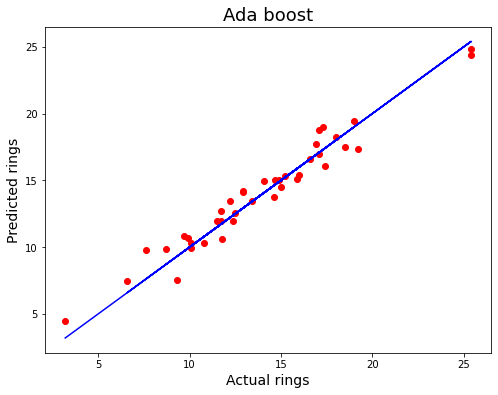

In [166]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_ad,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual rings",fontsize=14)
plt.ylabel("Predicted rings",fontsize=14)
plt.title("Ada boost",fontsize=18)
plt.show()

# Model Saving 

In [168]:
import pickle 
filename= "Ad.pkl"
pickle.dump(ad, open(filename,"wb"))

# Conclusion 

In [169]:
a=np.array(y_test)
predicted = np.array(ad.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,7.6,9.771429
1,11.5,11.930986
2,25.4,24.418750
3,19.2,17.325714
4,13.4,13.473684
5,12.9,14.150000
6,6.6,7.462500
7,17.3,18.996429
8,8.7,9.840909
9,18.5,17.507692
